In [1]:

#17/06/2025
#Tamim Mahmud from Daffodil International University
import torch

print("PyTorch version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("Device:", "CUDA (GPU)" if torch.cuda.is_available() else "CPU")


PyTorch version: 2.6.0+cu124
CUDA Available: True
Device: CUDA (GPU)


Linear Regression

In [2]:
import torch

Predictions: tensor([-1.2218, -1.2977, -1.3735], grad_fn=<AddBackward0>)


In [24]:
import torch
from torch import nn

# ক্লাস তৈরি — nn.Module থেকে ইনহেরিট করো
class LinearRegressionModel(nn.Module):  #.model → সঠিক: nn.Module
    def __init__(self):
        super().__init__()  # super এর পর dot এর আগে space থাকবে না

        # trainable parameters (weights & bias)
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method — model prediction
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias  # y = wx + b


# Model তৈরি করো
model = LinearRegressionModel()

# Input দাও
x = torch.tensor([1.0, 2.0, 3.0])

# Prediction করো
y_pred = model(x)

print("Predictions:", y_pred)

test=torch.tensor([[4.0]])
print(model(test))



Predictions: tensor([0.9853, 2.7230, 4.4606], grad_fn=<AddBackward0>)
tensor([[6.1982]], grad_fn=<AddBackward0>)


In [ ]:
#🧩 Step 1: Input & Output data তৈরি
x=torch.tensor([[1.0],[2.0],[3.0]])
y=torch.tensor([[3.0],[5.0],[7.0]])

আমরা এমন একটা ফাংশন থেকে ডেটা বানিয়েছি যেটা:
y = 2x + 1

যেমন:

x=1 → y=3

x=2 → y=5

x=3 → y=7



In [ ]:
#🧠 Step 2: মডেল তৈরি

model=nn.Linear(1,1)

এখানে PyTorch একটা Linear Layer বানায়:

ini
Copy code
y = wx + b
এখানে:

w: ওজন (weight) — শুরুতে random

b: বায়াস (bias) — শুরুতে random

মডেল শুরুতে জানেই না যে y = 2x + 1, ওকে শিখতে হবে।

In [ ]:
#🧪 Step 3: Training (শেখানো)

for epoch in range(1000):
  y_pred=model(x)
  loss=loss_fn(y_pred,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


🔁 এই লুপ 1000 বার চলছে। প্রতিবার যা হয়:

model(x) → x দিয়ে প্রেডিকশন করল

loss_fn(y_pred, y) → আসল y আর প্রেডিকশন y এর পার্থক্য হিসাব করল (MSE Loss)

backward() → Gradient বের করল

optimizer.step() → ওজন (w) আর বায়াস (b) আপডেট করল

এইভাবে মডেল আস্তে আস্তে w ≈ 2 আর b ≈ 1 শিখে নেয়।

In [23]:
#🔍 Step 4: Predict for unseen value (x = 4)
test=torch.tensor([[4.0]])
print(model(test))

tensor([[9.0078]], grad_fn=<AddmmBackward0>)


এখন model কে জিজ্ঞেস করা হচ্ছে:

“x = 4 দিলে y কী হবে?”

তুমি তো জানো, আসল ফাংশন ছিল y = 2x + 1
তাই আসল উত্তর হবে:
y = 2×4 + 1 = 9
✅ যদি model ঠিকভাবে শিখে থাকে, তবে output হবে 9.0 এর কাছাকাছি।

✅ ধরো output আসলো:

tensor([[9.02]], grad_fn=<AddmmBackward0>)
মানে:

9.02 ≈ আসল উত্তর 9.0 এর খুব কাছাকাছি → সঠিকভাবে শিখে ফেলেছে

grad_fn=<...> → এই টেনসর এখনো gradient ট্র্যাক করে কারণ এটা computational graph-এর অংশ

Learned weight (w): 1.9971305131912231
Learned bias (b): 1.0065230131149292
Prediction for x=4: y=9.00


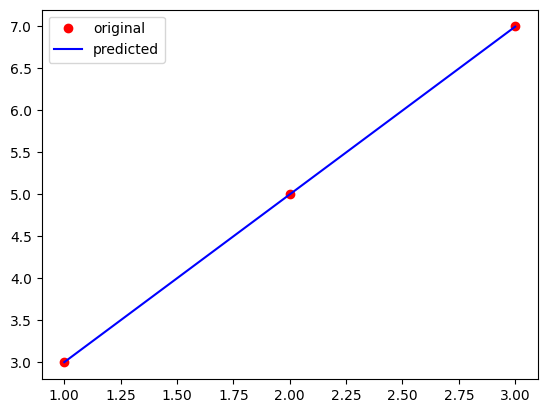

In [20]:
#ful code
import torch
import torch.nn as nn

# Data
x = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[3.0], [5.0], [7.0]])  # y = 2x + 1

# Model
model = nn.Linear(1, 1)  # Linear Model: y = wx + b

# Loss & Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train
for epoch in range(1000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 🔍 Check Learned Weight and Bias
print("Learned weight (w):", model.weight.item())
print("Learned bias (b):", model.bias.item())

# Test Prediction
test = torch.tensor([[4.0]])
prediction = model(test).item()
print(f"Prediction for x=4: y={prediction:.2f}")
x_np=x.numpy()
y_np=y.numpy()

predicted=model(x).detach().numpy()
plt.plot(x_np,y_np,'ro',label='original')
plt.plot(x_np,predicted,'b',label='predicted')
plt.legend()
plt.show()


In [26]:
2.0153181552886963*4+0.9651779532432556

9.02645057439804

In [2]:
import torch
import torch.nn as nn

# Correct shape: (3 samples, 1 feature each)
x = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[4.0], [7.0], [10.0]])  # Ideally y = 3x + 1

# Model
model = nn.Linear(1, 1)

# Loss and Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print learned parameters
print("Learned Weight:", model.weight.item())
print("Learned Bias:", model.bias.item())

# Make a prediction
test = torch.tensor([[4.0]])
prediction = model(test).item()
print(f"Prediction for x=4: y={prediction:.4f}")


Learned Weight: 3.001671552658081
Learned Bias: 0.9962008595466614
Prediction for x=4: y=13.0029


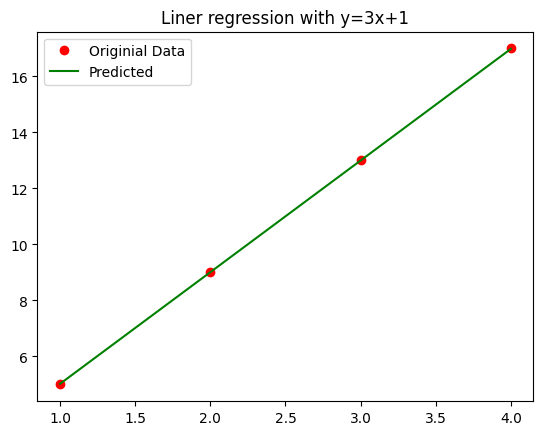

In [18]:


x_np=x.numpy()
y_np=y.numpy()
predicted=model(x).detach().numpy()
plt.plot(x_np,y_np,'ro',label='Originial Data')
plt.plot(x_np,predicted,color='green',label='Predicted')
plt.legend()
plt.title("Liner regression with y=3x+1")
plt.show()


In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
x=torch.tensor([[1.0],[2.0],[3.0],[4.0]])
y=torch.tensor([[5.0],[9.0],[13.0],[17.0]])

model=nn.Linear(1,1)

loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(1000):
  loss=loss_fn(y_pred,y)
  y_pred=model(x)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()


print("Learn weight:",model.weight.item())
print("Learn Bias:",model.bias.item())
test=torch.tensor([[5.0]])
prediction=model(test).item()
print(f"Prediction for X=5: y={prediction:.4f}")



Learn weight: 3.988190174102783
Learn Bias: 1.0347225666046143
Prediction for X=5: y=20.9757


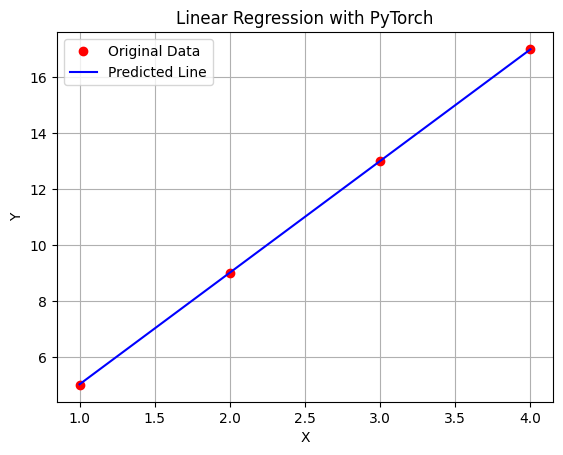

In [13]:
# Convert tensors to numpy
x_np = x.numpy()
y_np = y.numpy()
predicted = model(x).detach().numpy()

# Plot original data and predicted line
plt.plot(x_np, y_np, 'ro', label='Original Data')       # Red dots
plt.plot(x_np, predicted, 'b-', label='Predicted Line') # Blue line
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression with PyTorch")
plt.legend()
plt.grid(True)
plt.show()


Learned Weight: 2.994786024093628
Learned Bias: 1.011852741241455
Prediction for x=4: y=12.9910


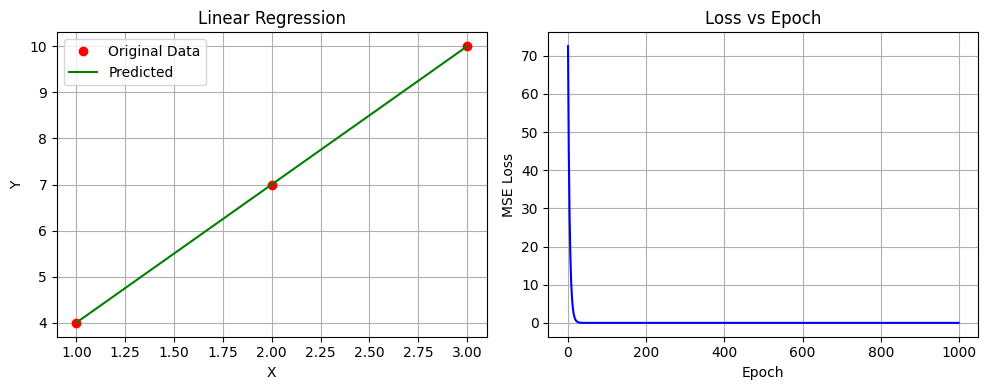

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Data (y = 3x + 1)
x = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[4.0], [7.0], [10.0]])

# Linear Model
model = nn.Linear(1, 1)

# Loss and Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# List to store losses for each epoch
losses = []

# Training loop
for epoch in range(1000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    losses.append(loss.item())  # Save loss for plotting

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print learned parameters
print("Learned Weight:", model.weight.item())
print("Learned Bias:", model.bias.item())

# Make prediction
test = torch.tensor([[4.0]])
prediction = model(test).item()
print(f"Prediction for x=4: y={prediction:.4f}")

# Plot 1: Original vs. Predicted
x_np = x.numpy()
y_np = y.numpy()
predicted = model(x).detach().numpy()

plt.figure(figsize=(10, 4))

# Subplot 1: Model prediction
plt.subplot(1, 2, 1)
plt.plot(x_np, y_np, 'ro', label='Original Data')     # Red dots
plt.plot(x_np, predicted, 'g-', label='Predicted')    # Green line
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

# Subplot 2: Loss vs Epoch
plt.subplot(1, 2, 2)
plt.plot(losses, 'b')
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

plt.tight_layout()
plt.show()


In [48]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

study_hours=torch.tensor([[2.5],[5.1],[3.2],[8.5],[3.5],[1.5],[9.2],[5.5],[8.3],[2.7],[7.7]],dtype=torch.float32)
Exam_scores=torch.tensor([[21],[47],[27],[75],[30],[20],[88],[60],[81],[25],[85]],dtype=torch.float32)

model=nn.Linear(1,1)
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
losses=[]

for epoch in range(1000):
  y_pred=model(study_hours)
  loss=loss_fn(y_pred,Exam_scores)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()



print("Learn weight:",model.weight.item())
print("Learn Bias:",model.bias.item())

test1=torch.tensor([[9.0]])
prediction=model(test1).item()
test2=torch.tensor([[12.0]])
prediction2=model(test2).item()
print(f"prediction for x=9.0: y={prediction:.4f}")
print(f"prediction for x=12.0: y={prediction2:.4f}")

Learn weight: 9.775994300842285
Learn Bias: -0.45200854539871216
prediction for x=9.0: y=87.5319
prediction for x=12.0: y=116.8599


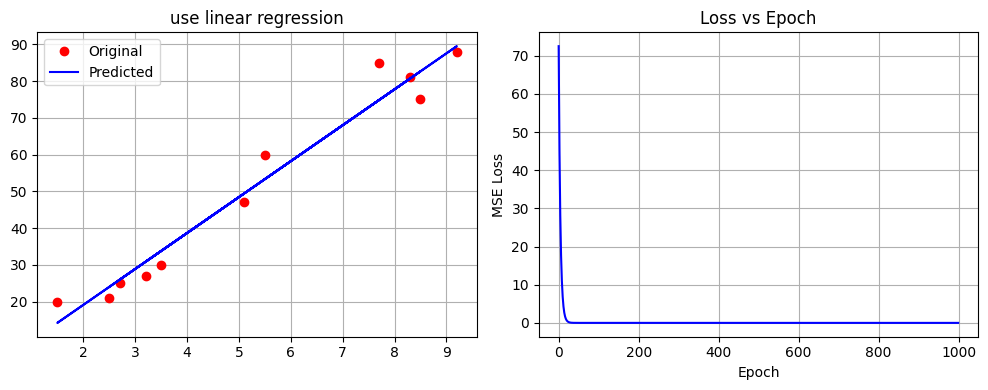

In [54]:
x_np=study_hours.numpy()
y_np=Exam_scores.numpy()
predicted=model(study_hours).detach().numpy()
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x_np,y_np,'ro',label='Original')
plt.plot(x_np,predicted,'b',label='Predicted')
plt.title('use linear regression')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)

plt.plot(losses,'b')
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)


plt.tight_layout()
plt.show()

In [100]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=fetch_california_housing()
X=data.data[:,0].reshape(-1,1)
y=data.target.reshape(-1,1)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)

y_train_tensor=torch.tensor(y_test,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32)

model=nn.Linear(1,1)

lose_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

losses=[]

for epoch in range(1000):
  y_pred=model(X_test_tensor)
  loss=lose_fn(y_pred,y_test_tensor)
  losses.append(loss.item())

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  if(epoch+1)%100==0:

    print(f"Epoch{epoch+1},Loss:{loss.item():.4f}")







Epoch100,Loss:0.5678
Epoch200,Loss:0.5554
Epoch300,Loss:0.5471
Epoch400,Loss:0.5416
Epoch500,Loss:0.5378
Epoch600,Loss:0.5354
Epoch700,Loss:0.5337
Epoch800,Loss:0.5326
Epoch900,Loss:0.5318
Epoch1000,Loss:0.5313


Epoch 100, Loss: 0.5809
Epoch 200, Loss: 0.5240
Epoch 300, Loss: 0.5230
Epoch 400, Loss: 0.5230
Epoch 500, Loss: 0.5230
Epoch 600, Loss: 0.5230
Epoch 700, Loss: 0.5230
Epoch 800, Loss: 0.5230
Epoch 900, Loss: 0.5230
Epoch 1000, Loss: 0.5230


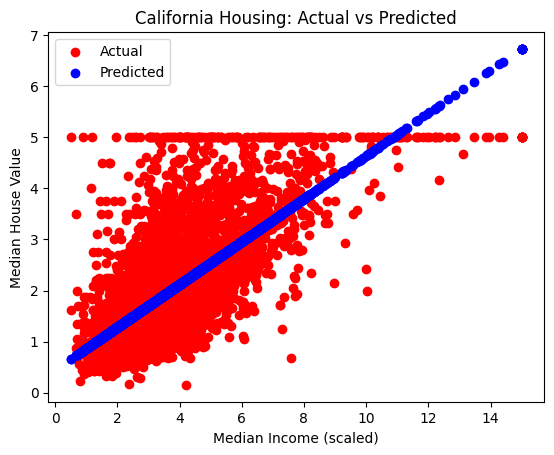

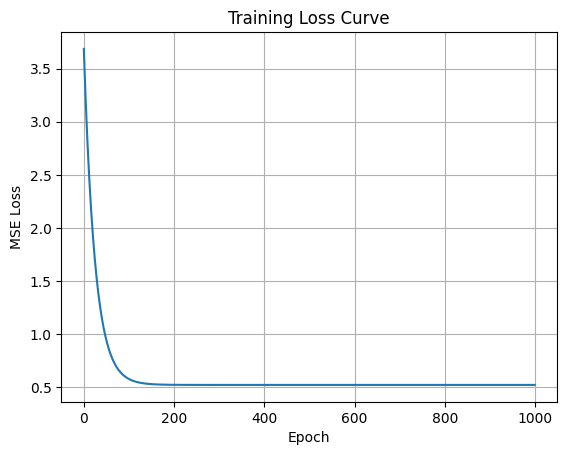

In [104]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
california = fetch_california_housing()
X = california.data[:, 0].reshape(-1, 1)  # Use 'MedInc' (median income) feature
y = california.target.reshape(-1, 1)      # Target is median house value

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features and target for better training
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# 4. Convert to PyTorch tensors (float)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 5. Define model
model = nn.Linear(1, 1)

# 6. Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 7. Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# 8. Evaluation
model.eval()
with torch.no_grad():
    y_test_pred_scaled = model(X_test_tensor)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.numpy())

# 9. Plot results
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_test_pred, color='blue', label='Predicted')
plt.xlabel("Median Income (scaled)")
plt.ylabel("Median House Value")
plt.title("California Housing: Actual vs Predicted")
plt.legend()
plt.show()

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()
